# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [190]:
import matplotlib.pyplot as plt

### Now take a look at the shapes of the X and y matricies 

In [13]:
X.shape

(70000, 784)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

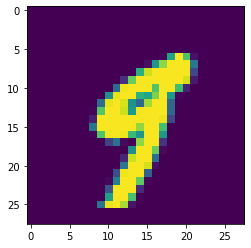

In [18]:
plt.imshow(X[36000].reshape(28,28))

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [19]:
# ^

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [20]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [21]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [39]:
y_train_5 = np.where(y_train == '5', 1, 0)

In [41]:
y_test_5 = np.where(y_test == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [22]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train_5)

C:\Users\feren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [85]:
X_train_pred = model.predict(X_train)

In [86]:
y_pred = model.predict(X_test)

In [67]:
# Yes

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [71]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [79]:
never_5_clf.fit(X_train, y_train)

In [94]:
y_pred_never5 = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [81]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [132]:
for func in [confusion_matrix, precision_score, recall_score, f1_score]:
    print(func(y_test_5, y_pred))

[[9027   81]
 [ 145  747]]
0.9021739130434783
0.8374439461883408
0.8686046511627907


In [97]:
for func in [confusion_matrix, precision_score, recall_score, f1_score]:
    print(func(y_test_5, y_pred_never5))

[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


In [130]:
print(recall_score.__repr__())

<method-wrapper '__repr__' of function object at 0x0000014228A298C8>


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [100]:
# First model gets 9027 TP, 81 FN
# 145 FP and 747 TN
# Very similar to the second one, however the second one only gets TPs because 9/10 numbers will b TP

In [101]:
# Second model gets 9108 TP, 0 FN, 892 FP and 0TN
# However this model has no accuracy no f1 and no recall, because all our predictions are 0

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [156]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

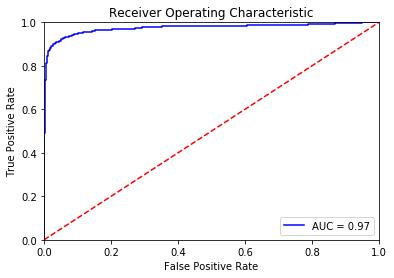

In [162]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_5, preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

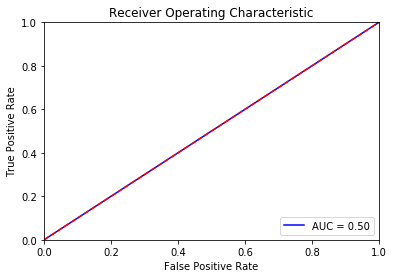

In [163]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_5, y_pred_never5)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [166]:
roc_auc_score(y_test_5, preds)

0.9747261806995673

In [167]:
roc_auc_score(y_test_5, y_pred_never5)

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [181]:
# 97% under AOC is pretty good, 50% means its the minimum. Its almost always getting the 0 right but never the 1, see classification report below.

In [182]:
from sklearn.metrics import classification_report

In [183]:
print(classification_report(y_test_5, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9108
           1       0.90      0.84      0.87       892

    accuracy                           0.98     10000
   macro avg       0.94      0.91      0.93     10000
weighted avg       0.98      0.98      0.98     10000



In [184]:
print(classification_report(y_test_5, y_pred_never5))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9108
           1       0.00      0.00      0.00       892

    accuracy                           0.91     10000
   macro avg       0.46      0.50      0.48     10000
weighted avg       0.83      0.91      0.87     10000

